# Imputation for the weatherAUS dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
RawData = pd.read_csv('weatherAUS.csv')

# Convert "Yes" and "no" to 1 and 0
RawData.RainToday.replace({'No': 0, 'Yes': 1},inplace = True)
RawData.RainTomorrow.replace({'No': 0, 'Yes': 1},inplace = True)


# Remove observations with missing target
DataWithTarget = RawData[RawData.RainTomorrow.notnull()]
print(DataWithTarget.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193292 entries, 0 to 198655
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           193292 non-null  object 
 1   Location       193292 non-null  object 
 2   MinTemp        192249 non-null  float64
 3   MaxTemp        192633 non-null  float64
 4   Rainfall       191418 non-null  float64
 5   Evaporation    95285 non-null   float64
 6   Sunshine       86895 non-null   float64
 7   WindGustDir    179776 non-null  object 
 8   WindGustSpeed  179881 non-null  float64
 9   WindDir9am     178536 non-null  object 
 10  WindDir3pm     185779 non-null  object 
 11  WindSpeed9am   190294 non-null  float64
 12  WindSpeed3pm   187127 non-null  float64
 13  Humidity9am    191157 non-null  float64
 14  Humidity3pm    187424 non-null  float64
 15  Pressure9am    172561 non-null  float64
 16  Pressure3pm    172563 non-null  float64
 17  Cloud9am       113217 non-nul

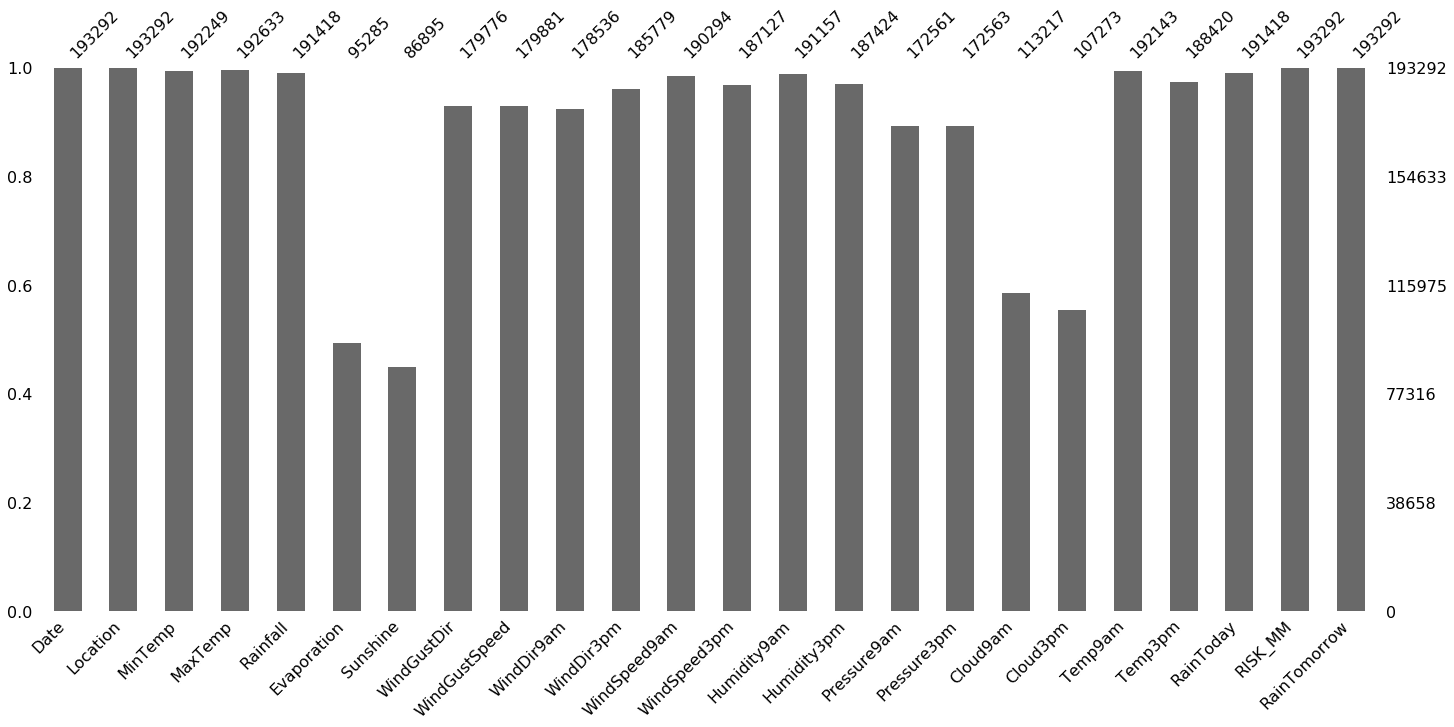

In [3]:
# Visualize the number of missing values 
msno.bar(DataWithTarget)

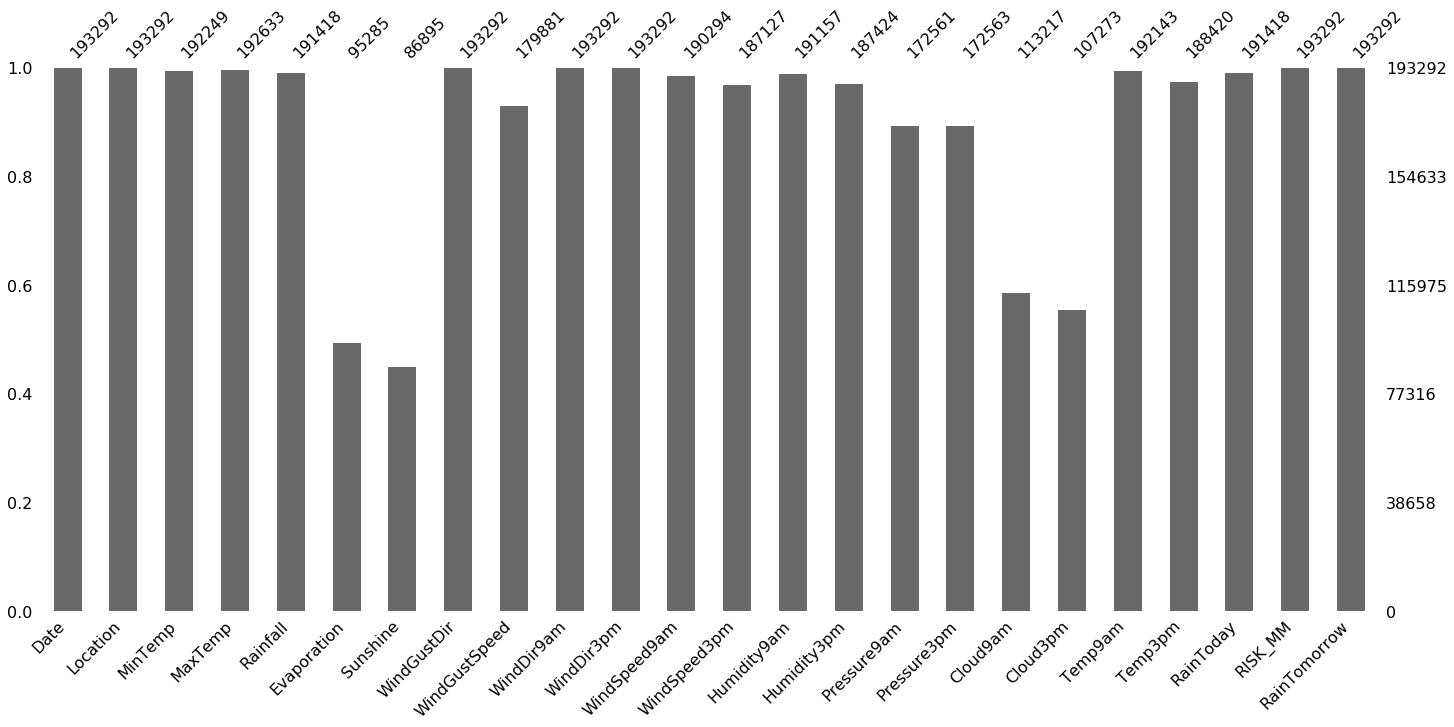

In [4]:
# Impute the missing values of the categorical variables by the most frequent value of each column, and then do label encoding.
Data = DataWithTarget.copy()
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in DataWithTarget.select_dtypes(include=['object']).columns:
    Data.loc[:,col] = Data.loc[:,col].fillna(DataWithTarget.loc[:,col].mode()[0])
    lencoders[col] = LabelEncoder()
    Data.loc[:,col] = lencoders[col].fit_transform(Data.loc[:, col])
    

msno.bar(Data) # ["WindGustDir", "WindDir9am", "WindDir3pm"] have been imputed     

In [5]:
# Single imputation for the numerical variables. 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=5, random_state=1)
ImputedData = Data.copy()
ImputedData.iloc[:, :] = imp.fit_transform(Data)


C:\Users\WENBO JING\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Note that the above code does not do Multiple Imputation. We could repeat the whole procedure multiple times if time allows.

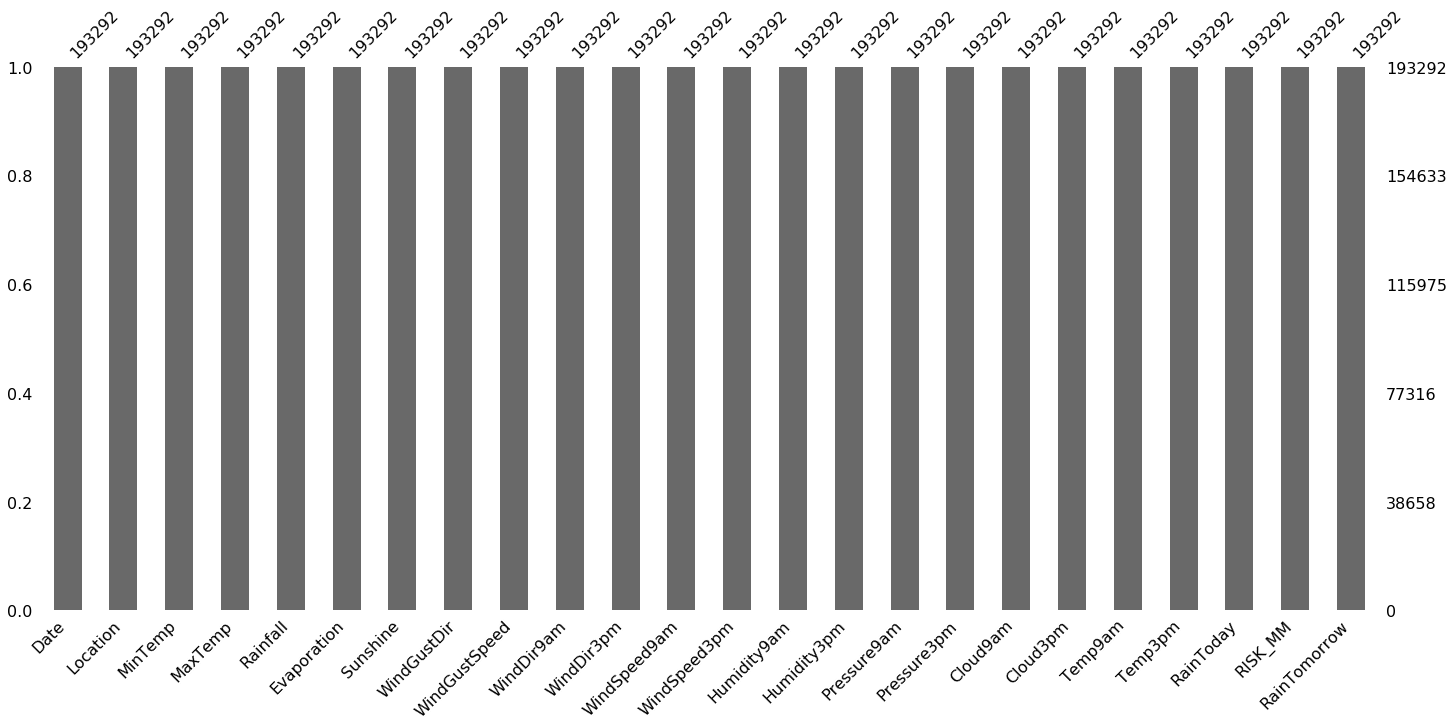

In [7]:
msno.bar(ImputedData) # All variables have been imputed
ImputedData.to_csv("ImputedData.csv")